In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("layoffs.csv")

In [8]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Roku,SF Bay Area,Media,200.0,0.07,2022-11-17,IPO,United States,208.0
1,Orchard,New York City,Real Estate,180.0,NaN,2022-11-17,Series D,United States,472.0
2,Chili Piper,New York City,Sales,58.0,NaN,2022-11-17,Series B,United States,54.0
3,Capitolis,New York City,Finance,37.0,0.25,2022-11-17,Series D,United States,281.0
4,TealBook,Toronto,Other,34.0,0.19,2022-11-17,Series B,Canada,73.0


In [9]:
df.shape

(1634, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1634 non-null   object 
 1   location             1634 non-null   object 
 2   industry             1631 non-null   object 
 3   total_laid_off       1167 non-null   float64
 4   percentage_laid_off  1093 non-null   float64
 5   date                 1634 non-null   object 
 6   stage                1630 non-null   object 
 7   country              1634 non-null   object 
 8   funds_raised         1522 non-null   float64
dtypes: float64(3), object(6)
memory usage: 115.0+ KB


In [11]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              1634 non-null   object        
 1   location             1634 non-null   object        
 2   industry             1631 non-null   object        
 3   total_laid_off       1167 non-null   float64       
 4   percentage_laid_off  1093 non-null   float64       
 5   date                 1634 non-null   datetime64[ns]
 6   stage                1630 non-null   object        
 7   country              1634 non-null   object        
 8   funds_raised         1522 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 115.0+ KB


In [13]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [14]:
df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         467
percentage_laid_off    541
date                     0
stage                    4
country                  0
funds_raised           112
year                     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              1634 non-null   object        
 1   location             1634 non-null   object        
 2   industry             1631 non-null   object        
 3   total_laid_off       1167 non-null   float64       
 4   percentage_laid_off  1093 non-null   float64       
 5   date                 1634 non-null   datetime64[ns]
 6   stage                1630 non-null   object        
 7   country              1634 non-null   object        
 8   funds_raised         1522 non-null   float64       
 9   year                 1634 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 127.8+ KB


# Dealing with missing values

In [16]:
df = df.drop(['funds_raised','percentage_laid_off','stage'], axis=1 )

In [17]:
df.total_laid_off = df.total_laid_off.fillna(1)
# assuming that atleast one person laid off from the company

In [18]:
df.industry = df.industry.fillna('Unknown')
df.total_laid_off = df.total_laid_off.astype(int)

In [19]:
df.shape

(1634, 7)

In [20]:
df.isna().sum()

company           0
location          0
industry          0
total_laid_off    0
date              0
country           0
year              0
dtype: int64

In [21]:
df.duplicated().value_counts()

False    1633
True        1
dtype: int64

In [22]:
duplicateRows = df[df.duplicated()]

In [23]:
duplicateRows

,company,location,industry,total_laid_off,date,country,year
781,Cazoo,London,Transportation,750,2022-06-07,United Kingdom,2022


In [24]:
df.drop_duplicates()

,company,location,industry,total_laid_off,date,country,year
0,Roku,SF Bay Area,Media,200,2022-11-17,United States,2022
1,Orchard,New York City,Real Estate,180,2022-11-17,United States,2022
2,Chili Piper,New York City,Sales,58,2022-11-17,United States,2022
3,Capitolis,New York City,Finance,37,2022-11-17,United States,2022
4,TealBook,Toronto,Other,34,2022-11-17,Canada,2022
...,...,...,...,...,...,...,...
1629,Service,Los Angeles,Travel,1,2020-03-16,United States,2020
1630,HopSkipDrive,Los Angeles,Transportation,8,2020-03-13,United States,2020
1631,Panda Squad,SF Bay Area,Consumer,6,2020-03-13,United States,2020
1632,Tamara Mellon,Los Angeles,Retail,20,2020-03-12,United States,2020


# Exploratory Data Analysis

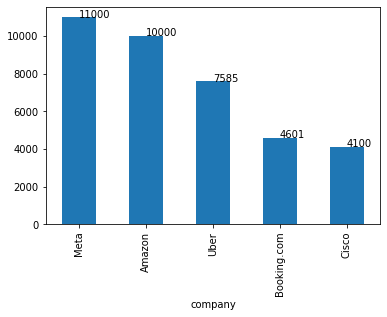

In [25]:
# Top 5 Companies with most layoffs
ax = df.groupby('company')['total_laid_off'].sum().sort_values(ascending = False).head().plot(kind = 'bar')
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [26]:
# Top 5 Countries with most companies
df.groupby('country')['company'].count().sort_values(ascending = False).head()

country
United States     1095
India              101
Canada              73
Brazil              52
United Kingdom      47
Name: company, dtype: int64

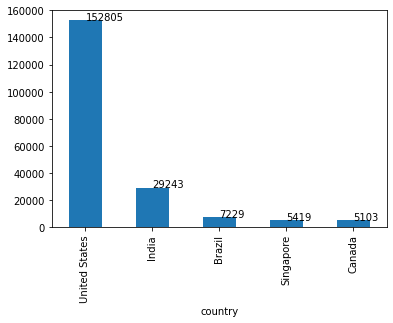

In [27]:
# Top 5 countries with most layoffs
ax = df.groupby('country')['total_laid_off'].sum().sort_values(ascending = False).head().plot(kind = 'bar')
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

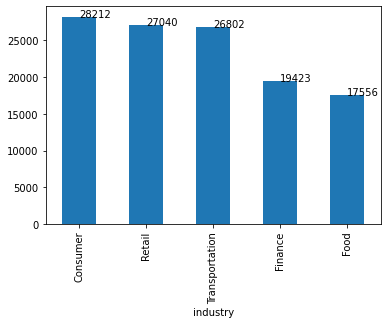

In [28]:
# Top 5 industries with most layoffs
ax = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending = False).head().plot(kind = 'bar')
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [29]:
df.groupby('year')['total_laid_off'].count()

year
2020    633
2021     42
2022    959
Name: total_laid_off, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         1634 non-null   object        
 1   location        1634 non-null   object        
 2   industry        1634 non-null   object        
 3   total_laid_off  1634 non-null   int32         
 4   date            1634 non-null   datetime64[ns]
 5   country         1634 non-null   object        
 6   year            1634 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 83.1+ KB


In [31]:

df_industry = df.groupby([ df.industry, df.year]).sum()
df_industry = df_industry.reset_index()

In [32]:
df_industry

,industry,year,total_laid_off
0,Aerospace,2020,562
1,Aerospace,2022,101
2,Construction,2020,898
3,Construction,2021,2434
4,Construction,2022,491
...,...,...,...
67,Transportation,2021,200
68,Transportation,2022,11936
69,Travel,2020,14002
70,Travel,2022,893


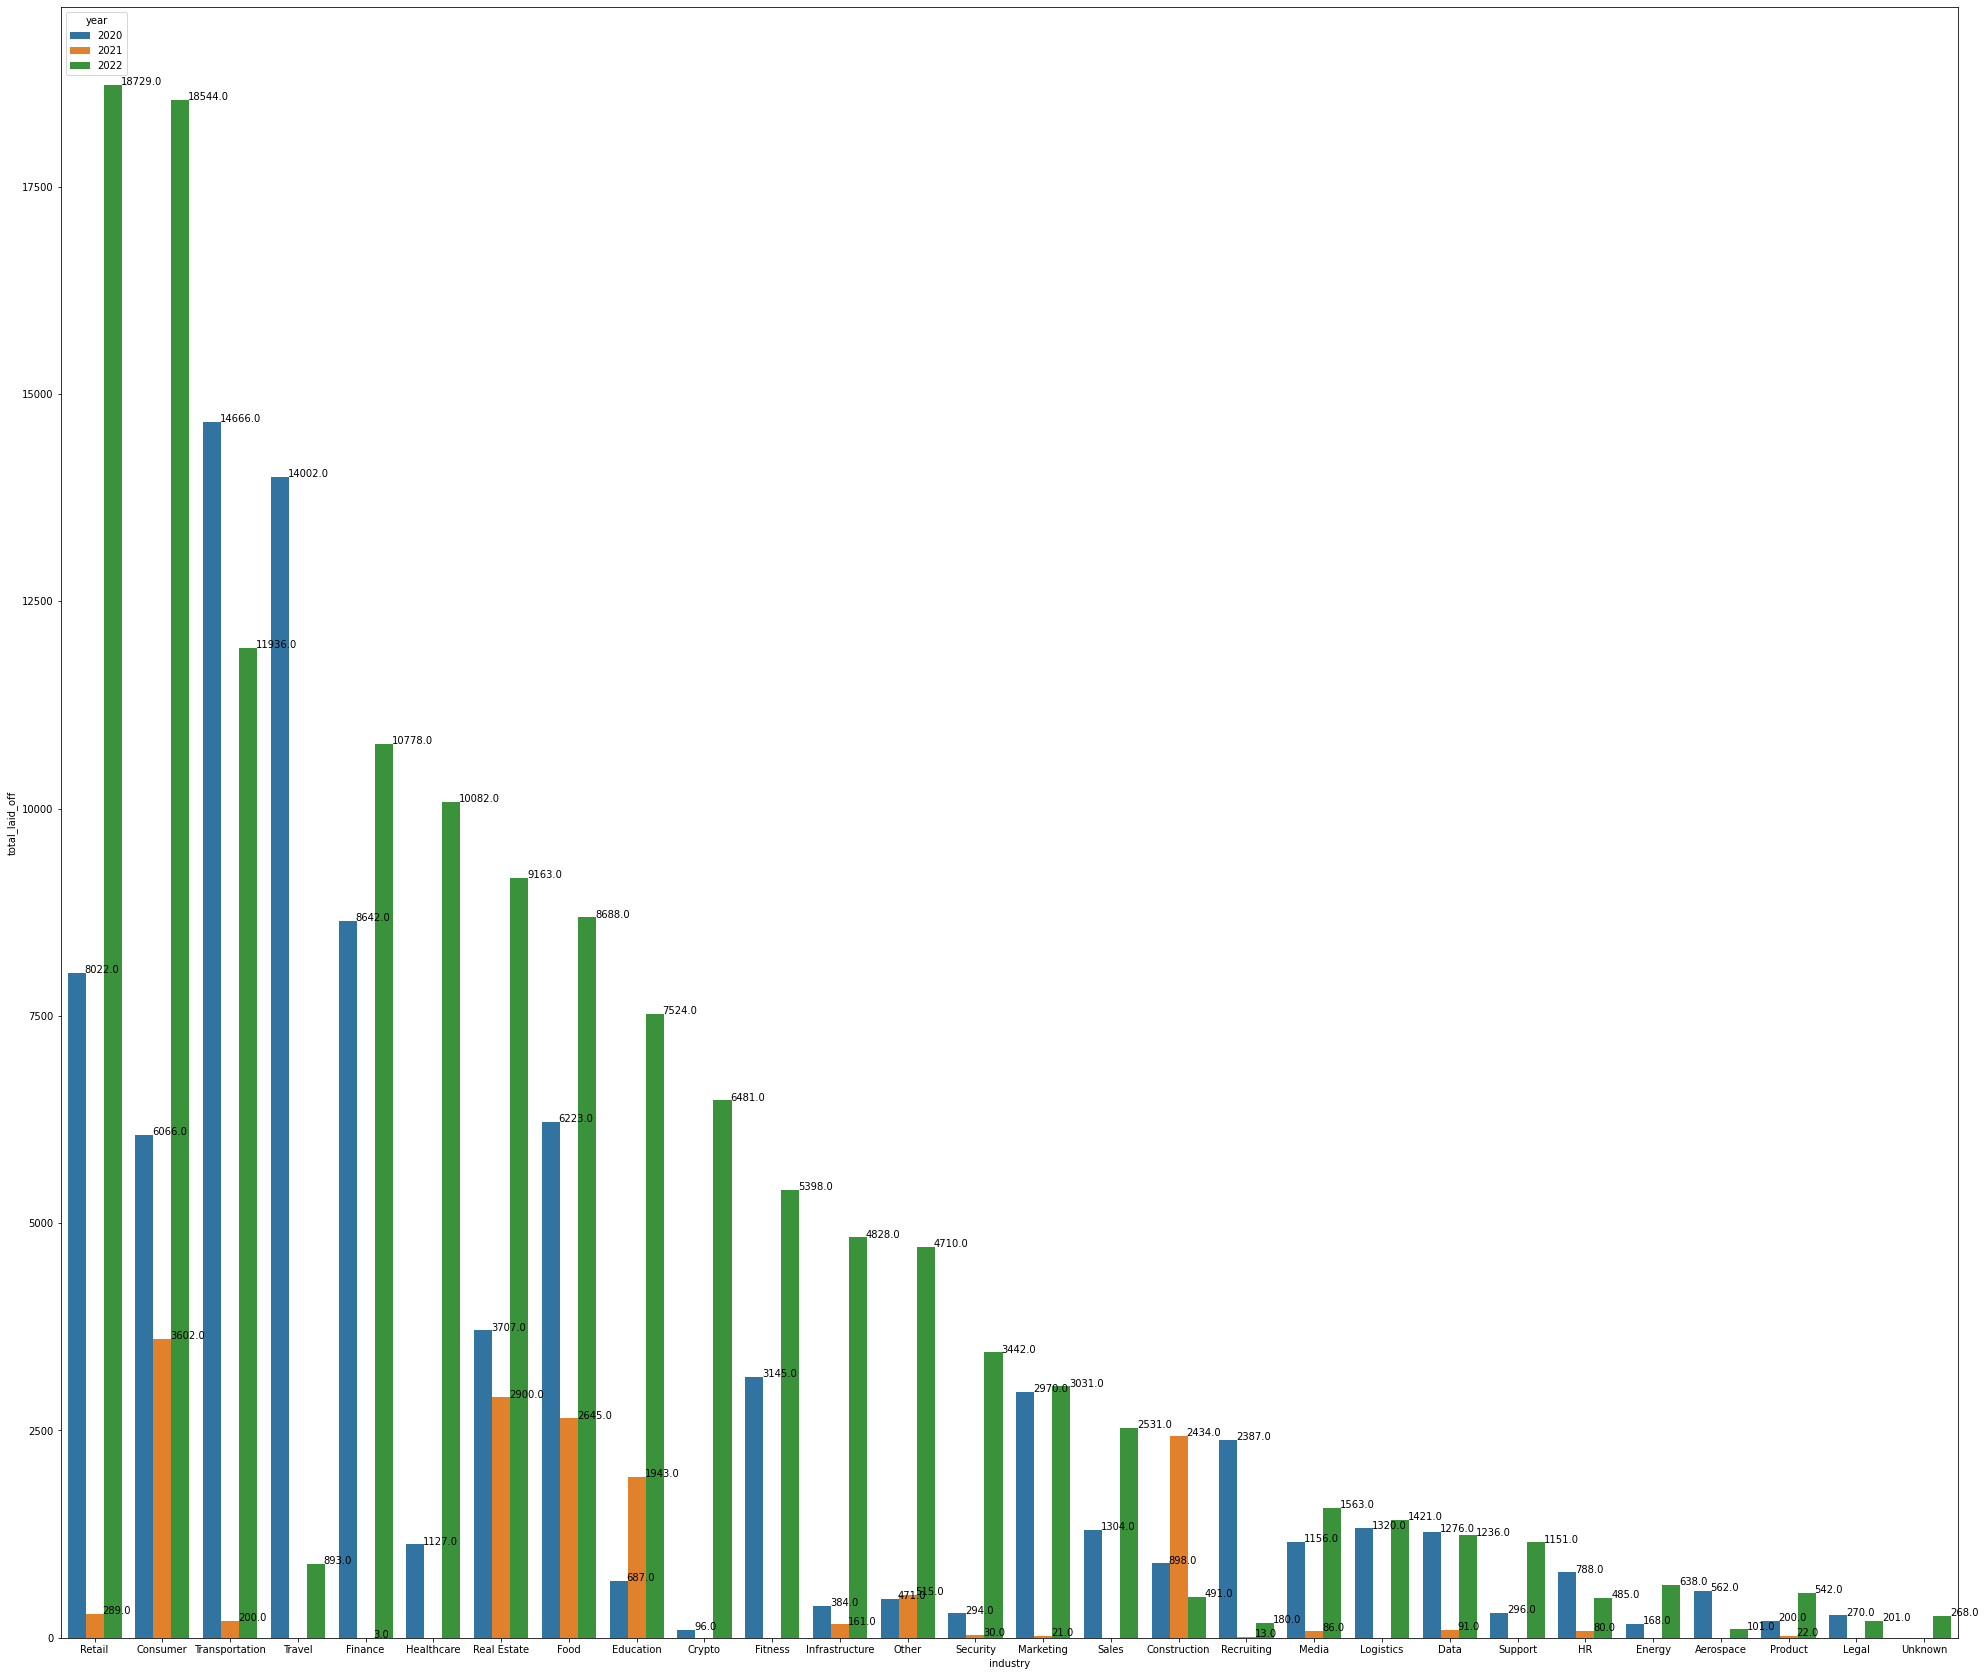

In [33]:
plt.figure(figsize=(34, 30))
ax = sns.barplot(data = df_industry.sort_values(['total_laid_off','year'], ascending=False), x='industry', y="total_laid_off", hue="year")
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

<AxesSubplot: xlabel='industry,year'>

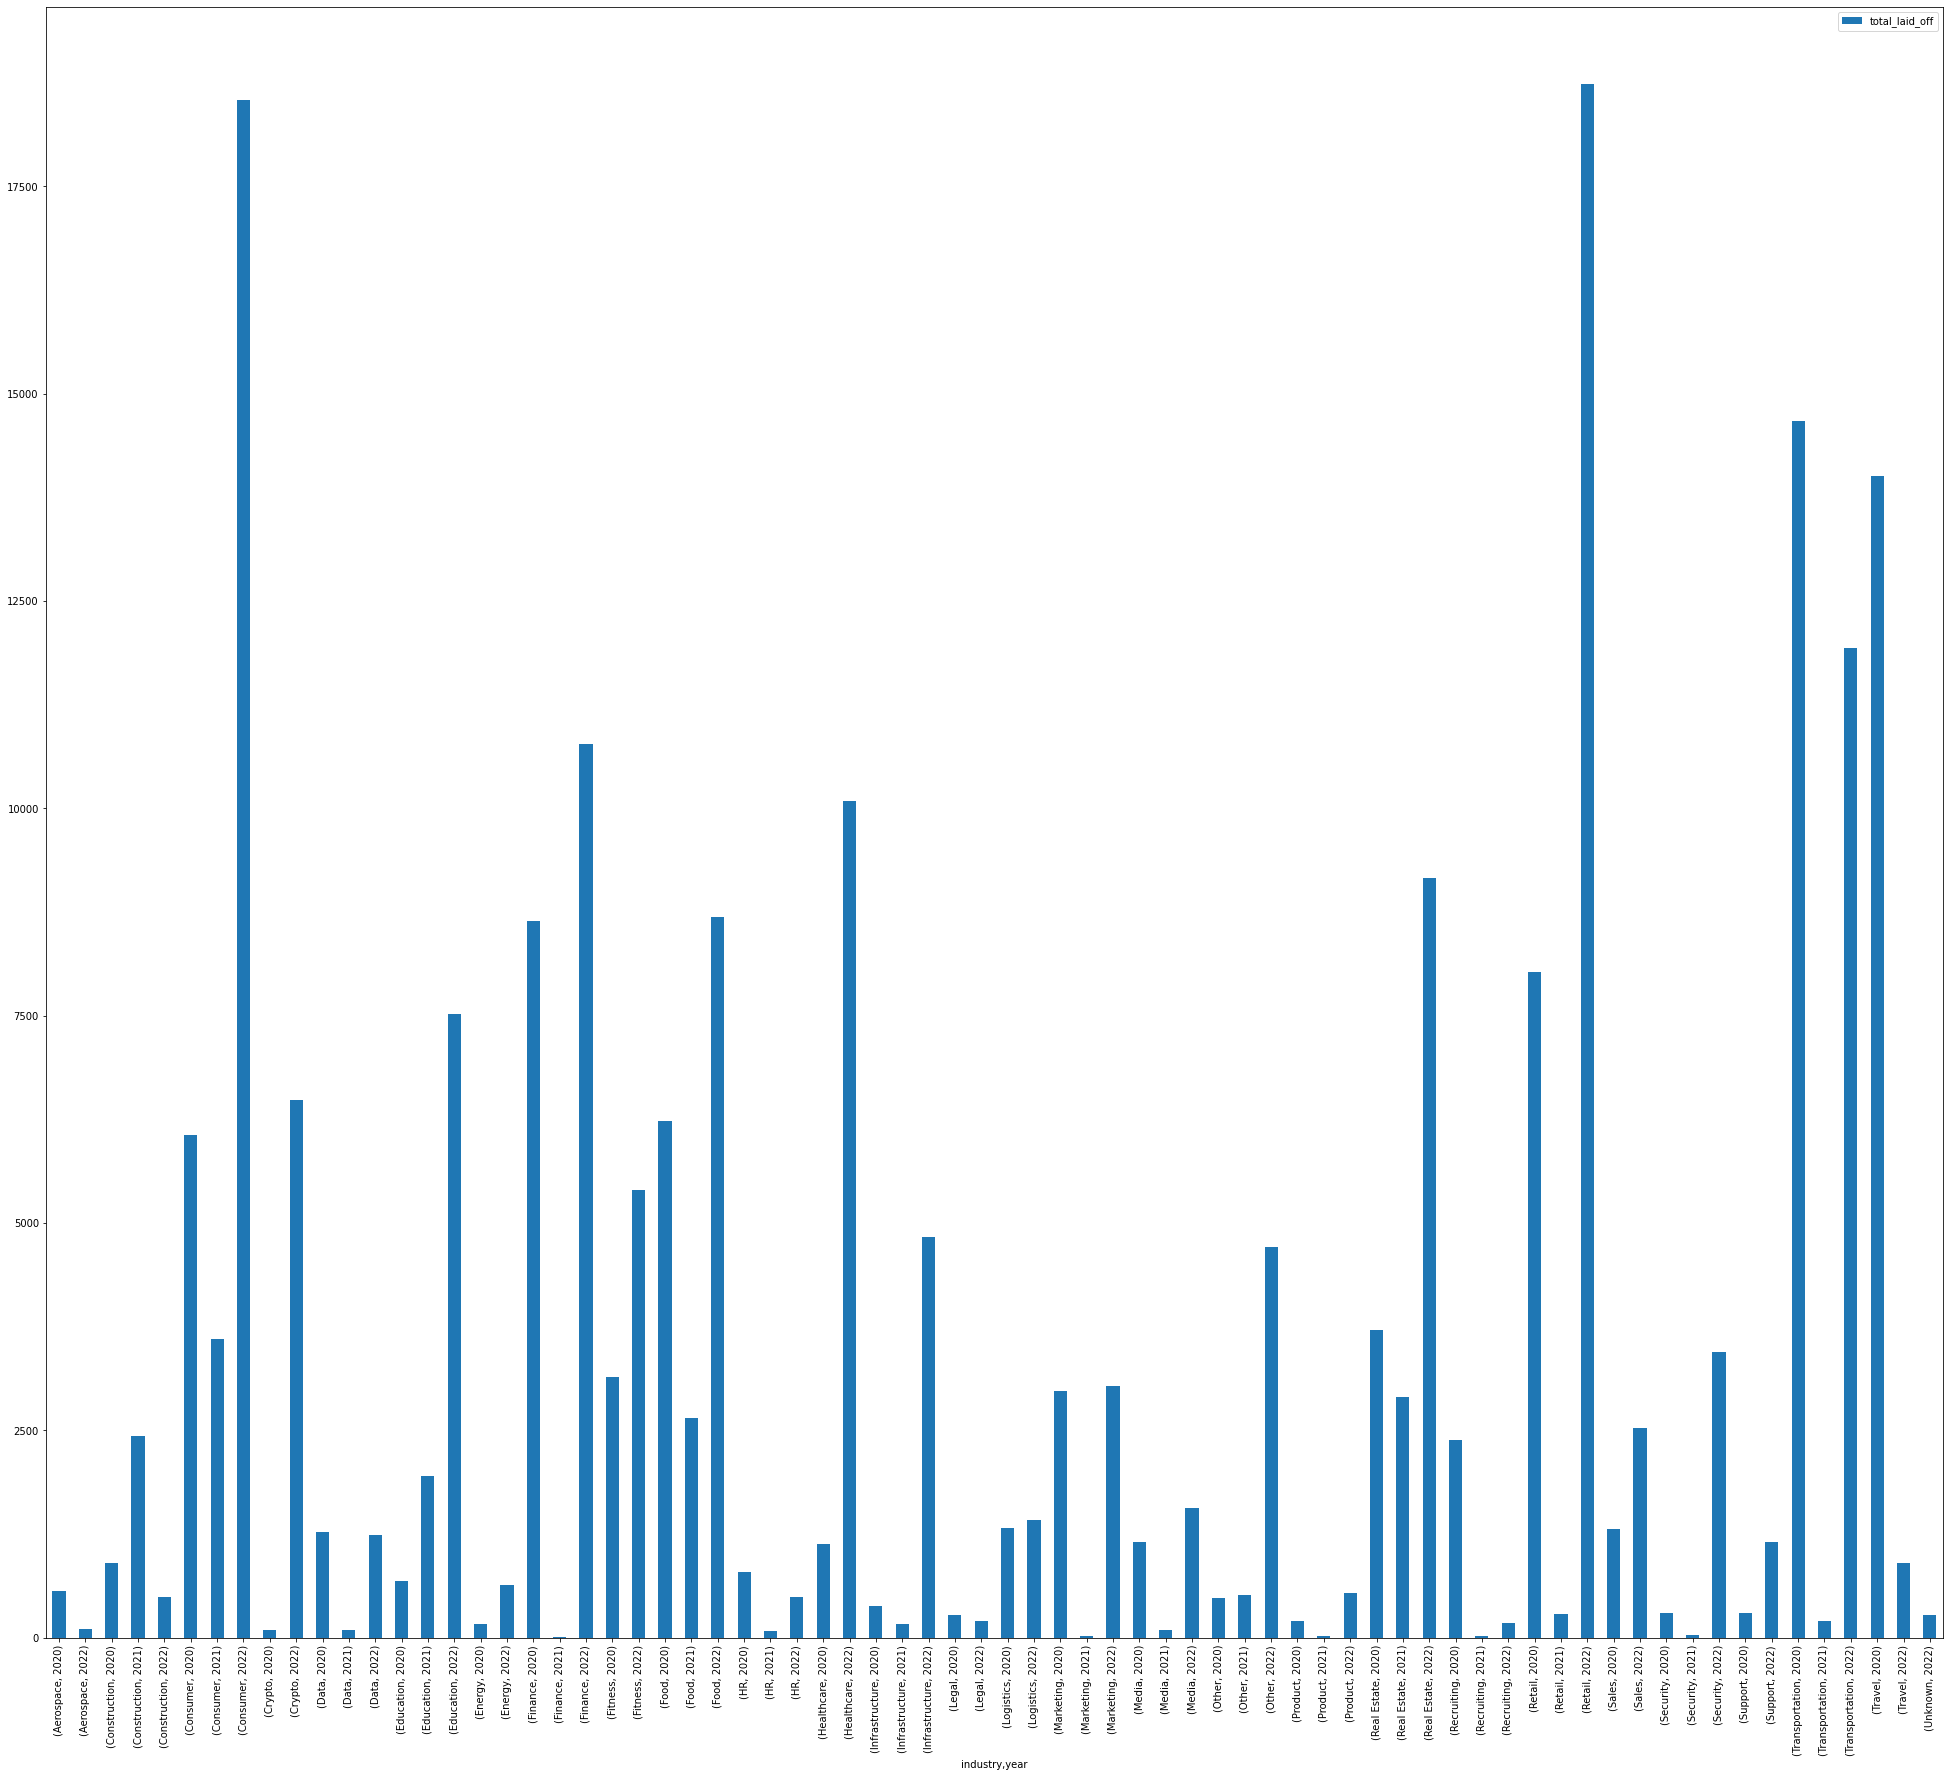

In [34]:
df.groupby([ df.industry, df.year]).sum().plot(kind = 'bar' , figsize = (34,30))

In [35]:
df['year'].value_counts()

2022    959
2020    633
2021     42
Name: year, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         1634 non-null   object        
 1   location        1634 non-null   object        
 2   industry        1634 non-null   object        
 3   total_laid_off  1634 non-null   int32         
 4   date            1634 non-null   datetime64[ns]
 5   country         1634 non-null   object        
 6   year            1634 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 83.1+ KB


In [37]:
df_2022 = df[df['year'] == 2022]

In [38]:
df_2022.shape

(959, 7)

In [39]:
df_2022

,company,location,industry,total_laid_off,date,country,year
0,Roku,SF Bay Area,Media,200,2022-11-17,United States,2022
1,Orchard,New York City,Real Estate,180,2022-11-17,United States,2022
2,Chili Piper,New York City,Sales,58,2022-11-17,United States,2022
3,Capitolis,New York City,Finance,37,2022-11-17,United States,2022
4,TealBook,Toronto,Other,34,2022-11-17,Canada,2022
...,...,...,...,...,...,...,...
954,Rhino,New York City,Real Estate,57,2022-02-03,United States,2022
955,Gopuff,Philadelphia,Food,100,2022-01-26,United States,2022
956,Glossier,New York City,Consumer,80,2022-01-26,United States,2022
957,Root Insurance,Columbus,Finance,330,2022-01-20,United States,2022


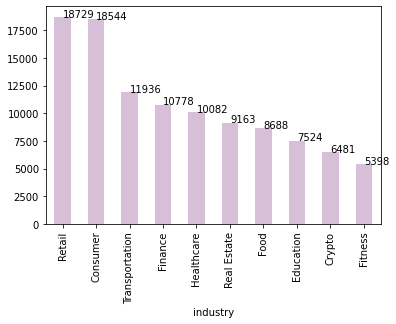

In [40]:
# Top 10 industries with most layoffs in 2022 
ax = df_2022.groupby('industry')['total_laid_off'].sum().nlargest(10).plot(kind = 'bar' , color = 'thistle')
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [41]:
df_2021 = df[df['year'] == 2021]
df_2020 = df[df['year'] == 2020]

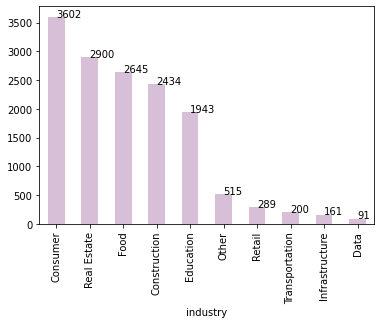

In [42]:
# Top 10 industries with most layoffs in 2021 
ax = df_2021.groupby('industry')['total_laid_off'].sum().nlargest(10).plot(kind = 'bar' , color = 'thistle')
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

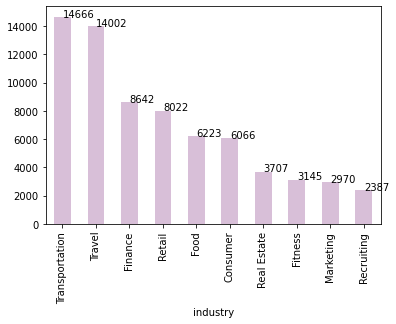

In [43]:
# Top 10 industries with most layoffs in 2020
ax = df_2020.groupby('industry')['total_laid_off'].sum().nlargest(10).plot(kind = 'bar' , color = 'thistle')
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [44]:
df.groupby('country')['total_laid_off'].sum().nlargest(5)

country
United States    152805
India             29243
Brazil             7229
Singapore          5419
Canada             5103
Name: total_laid_off, dtype: int32

United States is the country with highest number of layoffs.
Let's analyse the layoffs in united states

In [45]:
df_US = df[df['country'] == "United States"]

In [46]:
df_US.shape

(1095, 7)

In [47]:
df_US.groupby('location')['total_laid_off'].sum().nlargest(10)

location
SF Bay Area      75817
New York City    21279
Seattle          16071
Boston            7265
Los Angeles       5437
Chicago           5147
Phoenix           2504
Philadelphia      2340
Miami             2122
Austin            1901
Name: total_laid_off, dtype: int32

In [48]:
df_US.groupby('year')['total_laid_off'].sum()

year
2020    50477
2021     8681
2022    93647
Name: total_laid_off, dtype: int32

In [49]:
df.year = df.year.astype('str')

In [50]:
df_US

,company,location,industry,total_laid_off,date,country,year
0,Roku,SF Bay Area,Media,200,2022-11-17,United States,2022
1,Orchard,New York City,Real Estate,180,2022-11-17,United States,2022
2,Chili Piper,New York City,Sales,58,2022-11-17,United States,2022
3,Capitolis,New York City,Finance,37,2022-11-17,United States,2022
6,Amazon,Seattle,Retail,10000,2022-11-16,United States,2022
...,...,...,...,...,...,...,...
1629,Service,Los Angeles,Travel,1,2020-03-16,United States,2020
1630,HopSkipDrive,Los Angeles,Transportation,8,2020-03-13,United States,2020
1631,Panda Squad,SF Bay Area,Consumer,6,2020-03-13,United States,2020
1632,Tamara Mellon,Los Angeles,Retail,20,2020-03-12,United States,2020


In [51]:
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1633
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         1095 non-null   object        
 1   location        1095 non-null   object        
 2   industry        1095 non-null   object        
 3   total_laid_off  1095 non-null   int32         
 4   date            1095 non-null   datetime64[ns]
 5   country         1095 non-null   object        
 6   year            1095 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 64.2+ KB


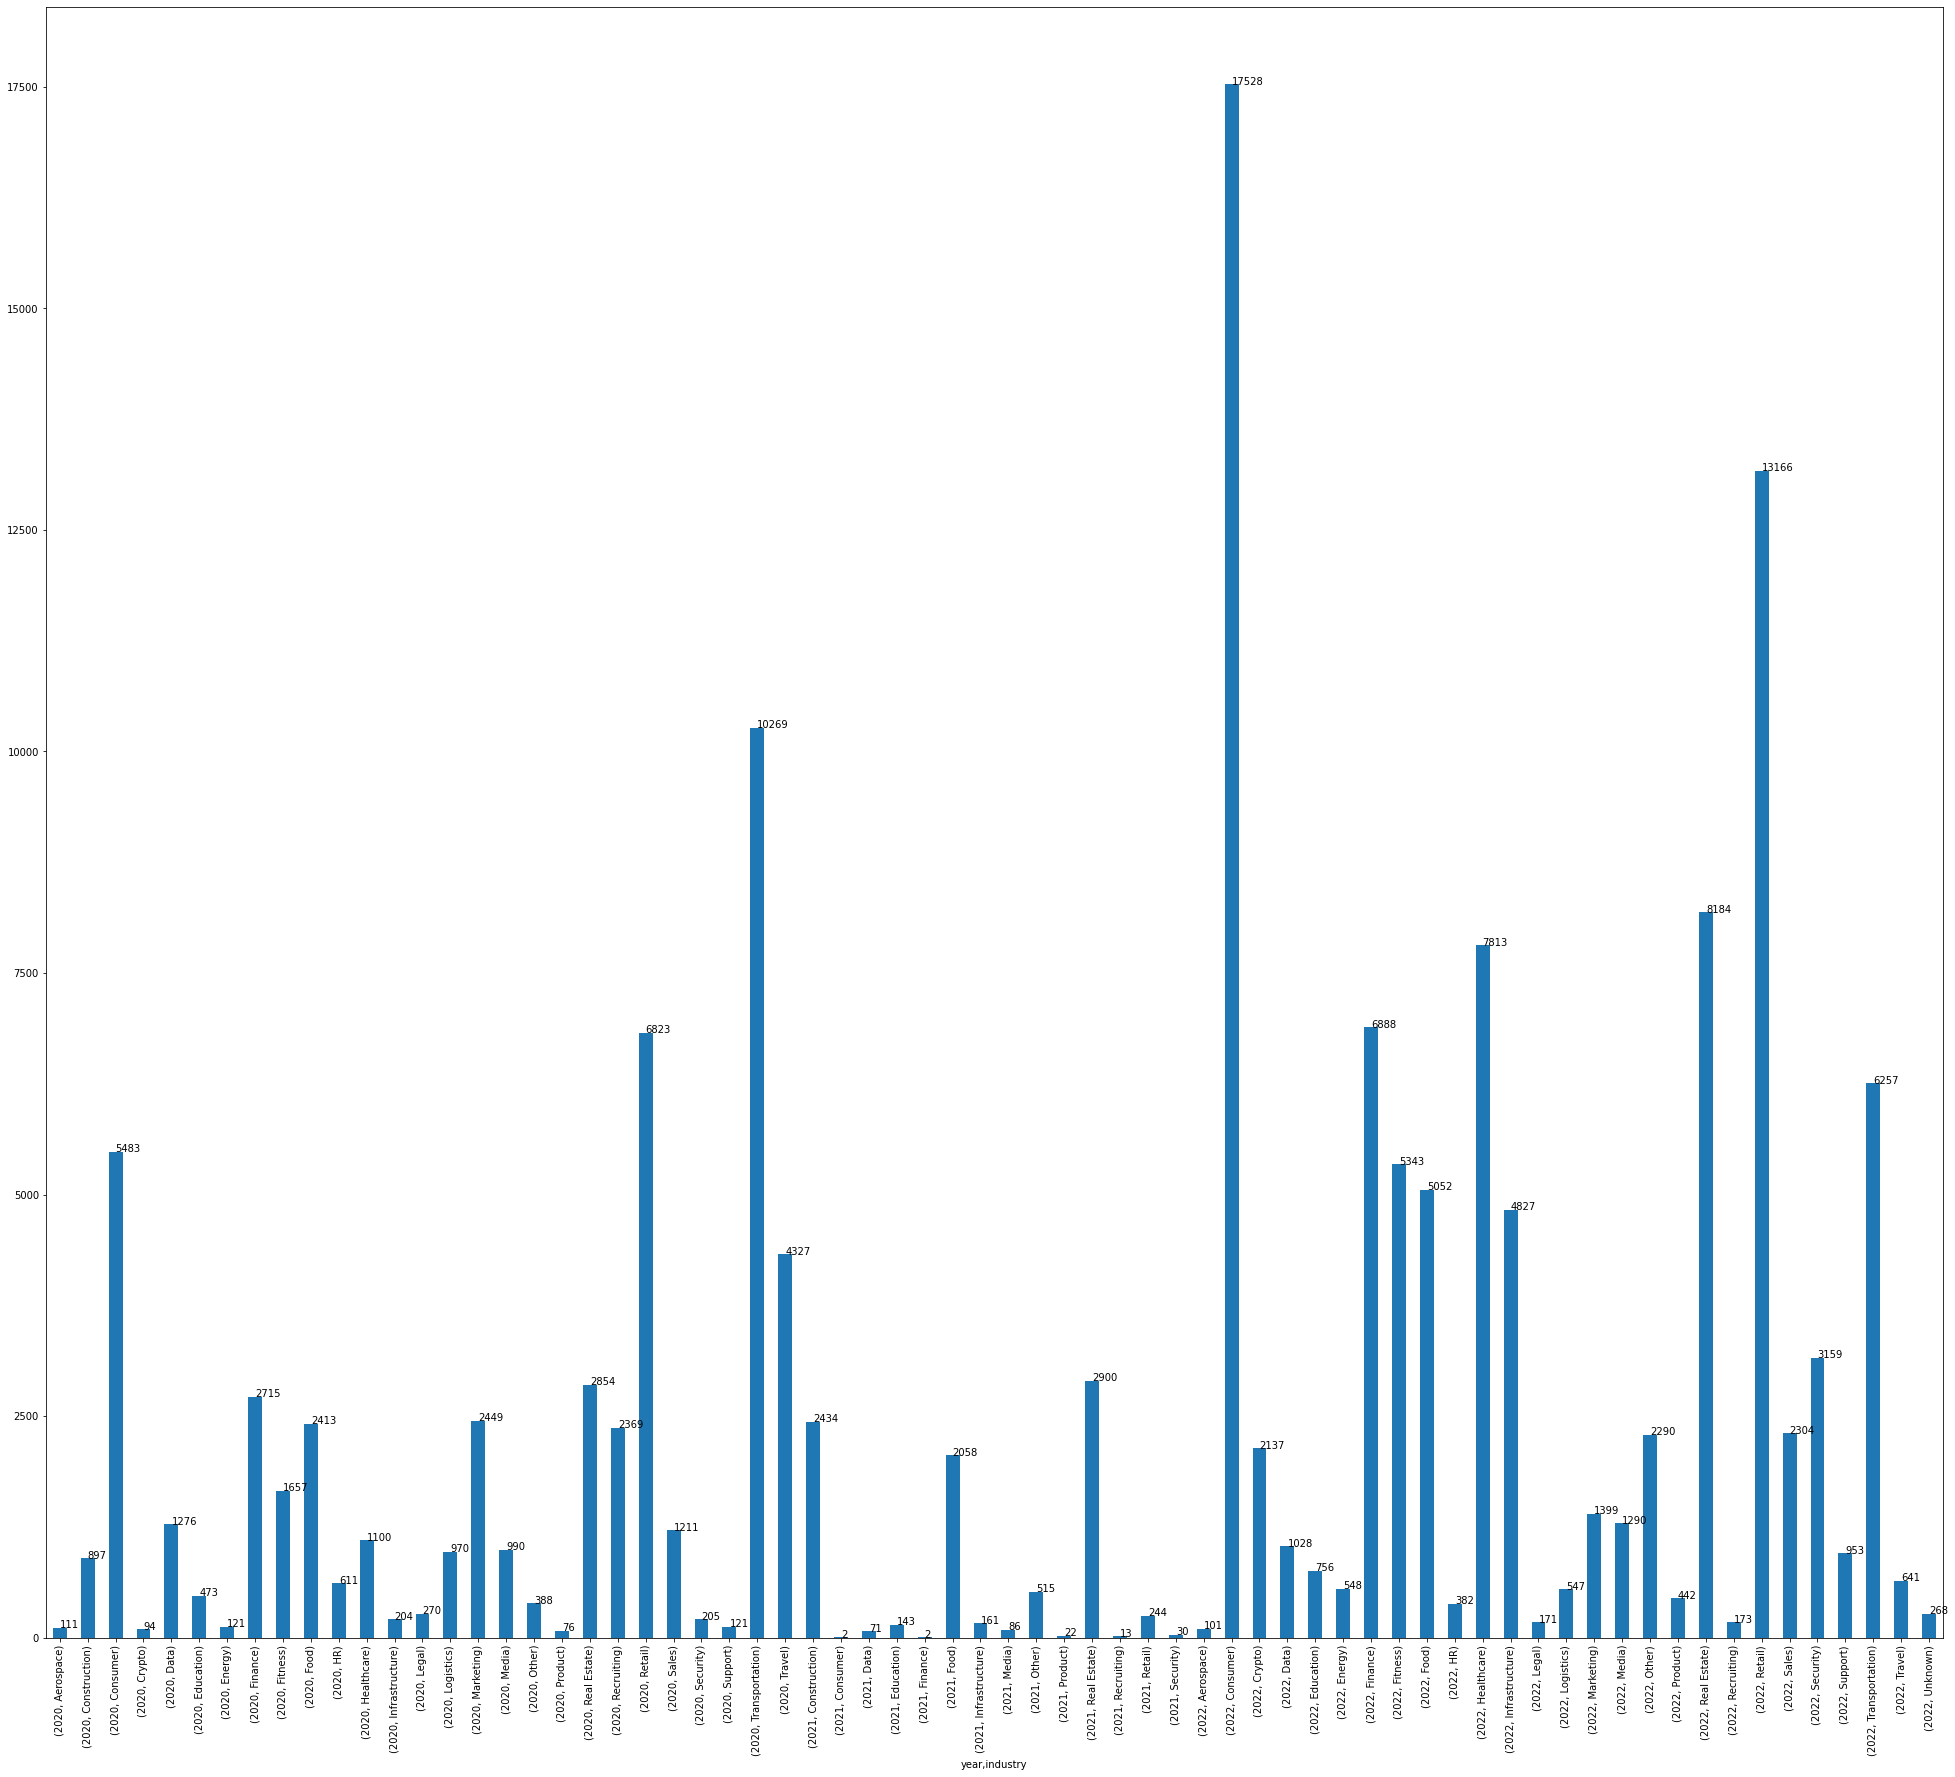

In [52]:
ax = df_US.groupby(['year','industry'])['total_laid_off'].agg('sum').plot(kind='bar',figsize = (34,30))
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In  United States, the most layoffs in 2020 and 2022 are in transportation industry and consumer industry respectively.

In [53]:
df_US.groupby([df['year']=='2022','industry'])['total_laid_off'].sum()

year   industry      
False  Aerospace           111
       Construction       3331
       Consumer           5485
       Crypto               94
       Data               1347
       Education           616
       Energy              121
       Finance            2717
       Fitness            1657
       Food               4471
       HR                  611
       Healthcare         1100
       Infrastructure      365
       Legal               270
       Logistics           970
       Marketing          2449
       Media              1076
       Other               903
       Product              98
       Real Estate        5754
       Recruiting         2382
       Retail             7067
       Sales              1211
       Security            235
       Support             121
       Transportation    10269
       Travel             4327
True   Aerospace           101
       Consumer          17528
       Crypto             2137
       Data               1028
       Education 

layoffs by industry and year in United States


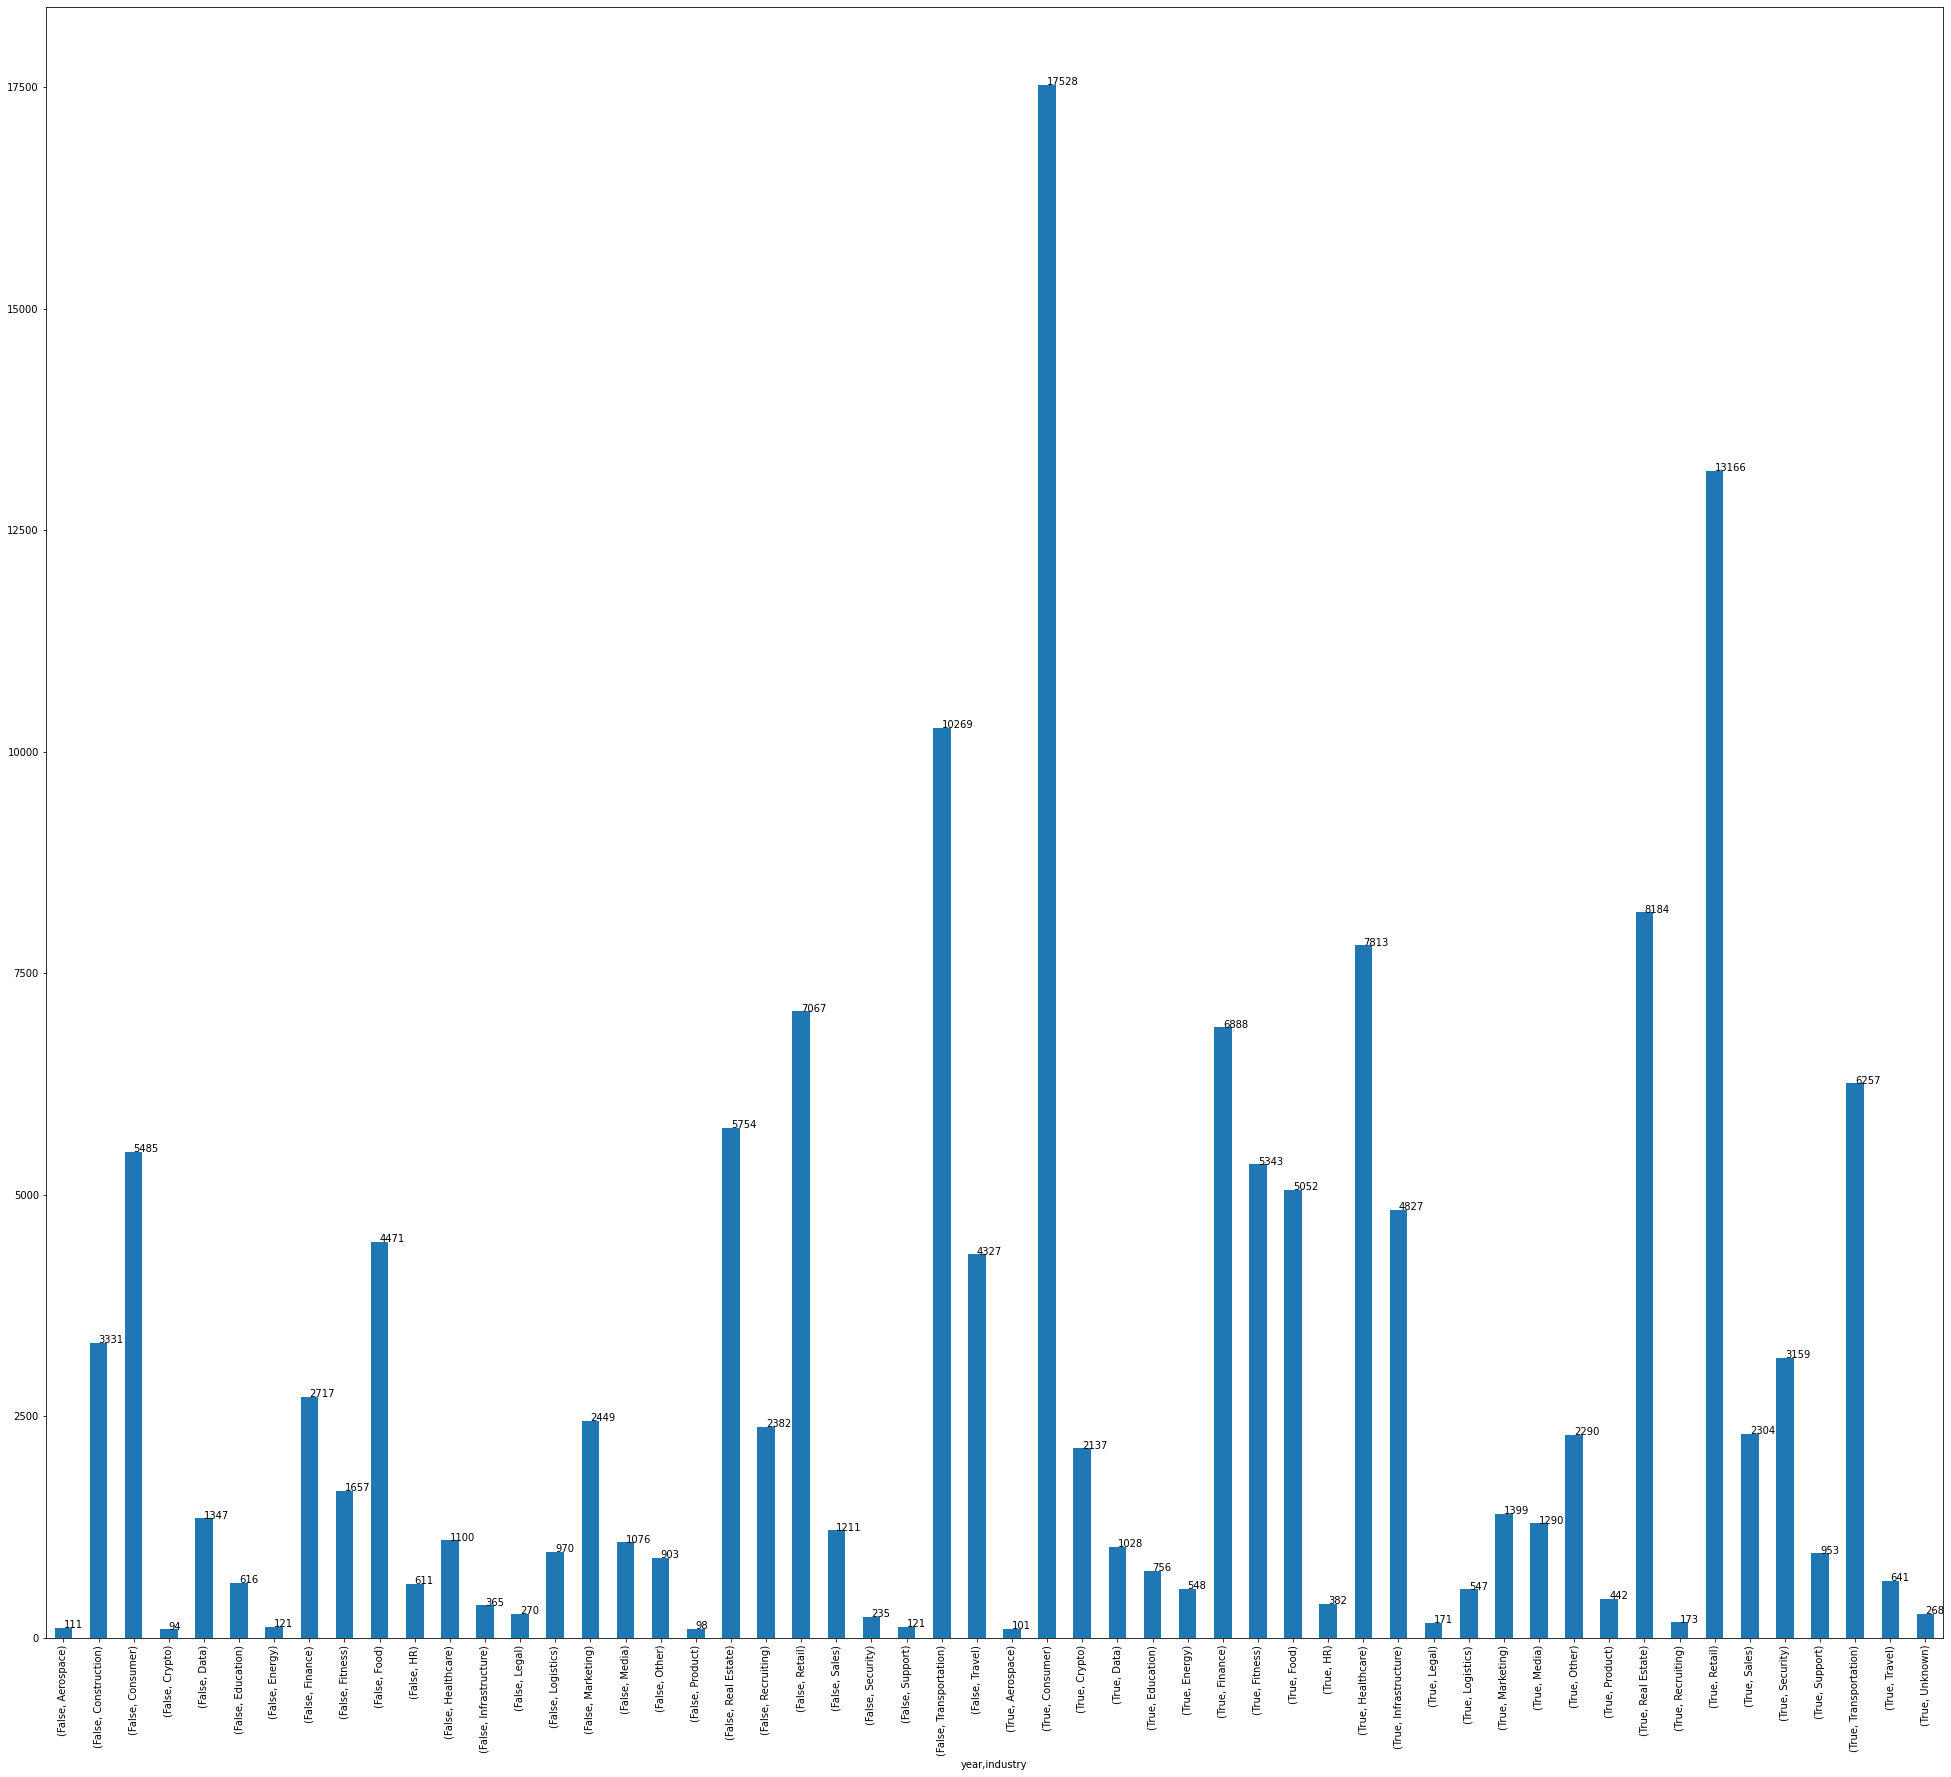

In [54]:
ax = df_US.groupby([df['year'] == '2022' ,'industry'])['total_laid_off'].sum().plot(kind='bar',figsize = (34,30))
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [55]:
df_US.groupby(['year','industry'])['total_laid_off'].agg('sum')

year  industry      
2020  Aerospace          111
      Construction       897
      Consumer          5483
      Crypto              94
      Data              1276
                        ... 
2022  Security          3159
      Support            953
      Transportation    6257
      Travel             641
      Unknown            268
Name: total_laid_off, Length: 68, dtype: int32

In [56]:
df_other =  df[df['country'] != "United States"]

<AxesSubplot: xlabel='year,industry'>

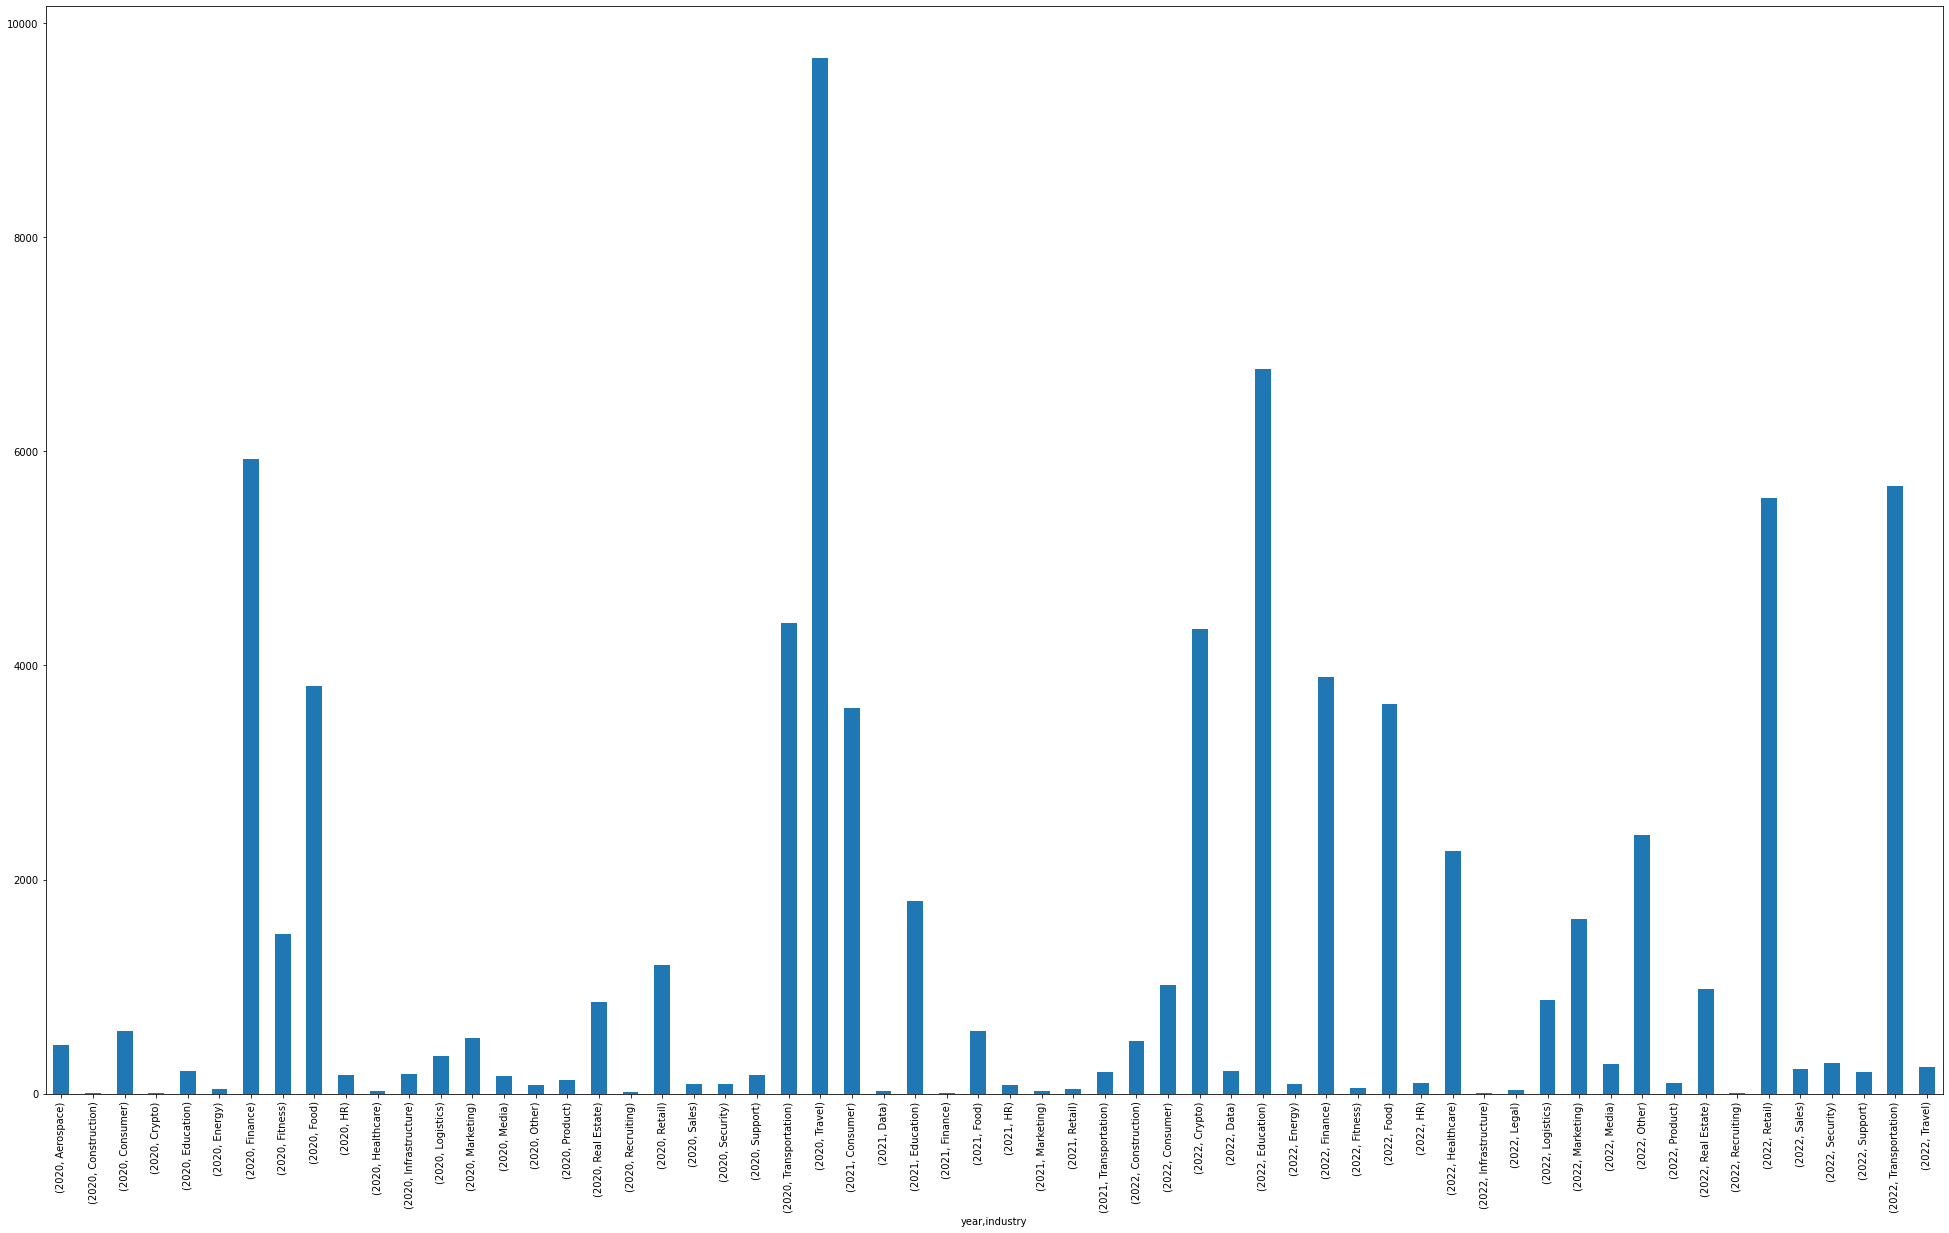

In [57]:
df_other.groupby(['year','industry'])['total_laid_off'].agg('sum').plot(kind = 'bar', figsize = (34,20))

In countries other than United States, the most layoffs in 2020 and 2022 are in travel industry and education industry respectively.

In [58]:
df_other.groupby(['year','industry'])['total_laid_off'].agg('sum').sort_values( ascending=False)

year  industry      
2020  Travel            9675
2022  Education         6768
2020  Finance           5927
2022  Transportation    5679
      Retail            5563
2020  Transportation    4397
2022  Crypto            4344
      Finance           3890
2020  Food              3810
2022  Food              3636
2021  Consumer          3600
2022  Other             2420
      Healthcare        2269
2021  Education         1800
2022  Marketing         1632
2020  Fitness           1488
      Retail            1199
2022  Consumer          1016
      Real Estate        979
      Logistics          874
2020  Real Estate        853
2021  Food               587
2020  Consumer           583
      Marketing          521
2022  Construction       491
2020  Aerospace          451
      Logistics          350
2022  Security           283
      Media              273
      Travel             252
      Sales              227
2020  Education          214
2022  Data               208
2021  Transportation  

In [59]:
df_india = df[df['country'] == 'India']

In [60]:
df_india.groupby(['year','industry'])['total_laid_off'].agg('sum').sort_values( ascending=False)

year  industry      
2022  Education         6193
2020  Food              2770
      Finance           2631
      Transportation    2490
2022  Retail            2026
2020  Travel            1901
2022  Transportation    1841
2021  Consumer          1800
      Education         1800
2020  Fitness            920
      Retail             851
2022  Healthcare         757
      Finance            550
2020  Marketing          411
      Real Estate        350
      Logistics          340
      Consumer           270
2022  Logistics          250
      Food               231
2021  Transportation     200
      Food               200
2022  Consumer           140
      Construction       140
2021  HR                  80
2022  Crypto              60
      Data                40
      Media                1
Name: total_laid_off, dtype: int32

In India, the most layoffs in 2020 and 2022 are in food industry and education industry respectively.

In [ ]:
 df.to_csv(index=False)

In [62]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts) 

In [63]:
from pathlib import Path  
filepath = Path('folder/subfolder/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  

In [64]:
import os  
os.makedirs('folder/subfolder', exist_ok=True)  
df.to_csv('folder/subfolder/out.csv')  